In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm

C:\Users\14725\AppData\Local\Temp\ipykernel_29140\3385721818.py:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


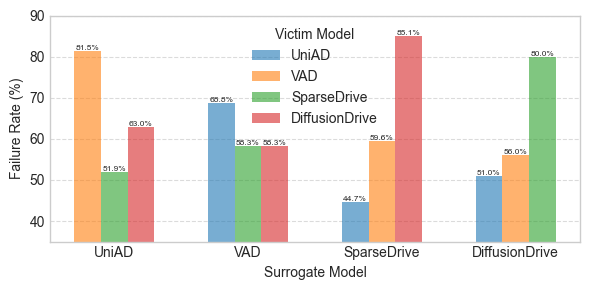

In [ ]:
plt.style.use('seaborn-whitegrid')

# Data extracted from the table
methods = ['UniAD', 'VAD', 'SparseDrive', 'DiffusionDrive']
data = [
    [None, 81.48, 51.85, 62.96],  # UniAD row
    [68.75, None, 58.33, 58.33],  # VAD row
    [44.68, 59.57, None, 85.11],  # SparseDrive row
    [51.00, 56.00, 80.00, None]   # DiffusionDrive row
]

# Number of groups and bars per group
groups = len(methods)

x = np.arange(groups)

# Width of each bar
bar_width = 0.2

poses = np.array([
    [2, 3, 4],
    [1, 3, 4],
    [1, 2, 4],
    [1, 2, 3]
])

offsets = np.array([
    [-1, -1, -1],
    [-1, 0, 0],
    [0, 0, 1],
    [1, 1, 1]
])

heights = np.array([
    [68.75, 44.68, 51.00],  
    [81.48, 59.57, 56.00],
    [51.85, 58.33, 80.00],
    [62.96, 58.33, 85.11]
])

# Create the figure and axes
fig, ax = plt.subplots(figsize=(6, 3))

barss = []
# Plot each group of bars
for i in range(4):
    bars = ax.bar(poses[i] + offsets[i] * bar_width, height=heights[i], width=bar_width, label=methods[i], alpha=0.6)
    barss.append(bars)
    
# Add data labels
for i in range(4):
    for j in range(len(heights[i])):
        if heights[i][j] is not None:
            ax.text(poses[i][j] + offsets[i][j] * bar_width, heights[i][j], f'{heights[i][j]:.1f}%', ha='center', va='bottom', fontsize=6)

# Customize the plot
ax.set_xlabel('Surrogate Model')
ax.set_ylabel('Failure Rate (%)')
# ax.set_title('Performance Comparison of Methods')
ax.set_xticks(x + 1)  # Center x-axis ticks
ax.set_xticklabels(methods, rotation=0)  # Rotate x-axis labels
ax.set_ylim(35, 90)  # Set y-axis limits
ax.legend(title="Victim Model")
ax.grid(axis='y', linestyle='--', alpha=0.7)
ax.grid(axis='x', linestyle='--', alpha=0)

# Show the plot
plt.tight_layout()
# plt.show()
# plt.close()
plt.savefig('trans.pdf', bbox_inches='tight')

C:\Users\14725\AppData\Local\Temp\ipykernel_40496\2509994301.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


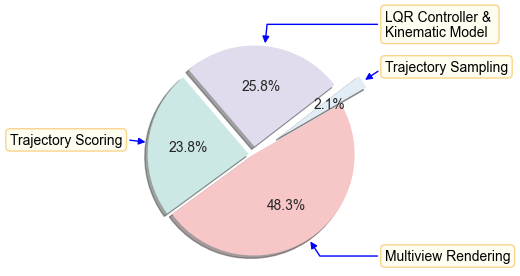

In [52]:
plt.style.use('seaborn-whitegrid')

# Data
labels = ['Trajectory Sampling', 'LQR Controller & \nKinematic Model', 'Trajectory Scoring', 'Multiview Rendering']
colors = ['#e3edf5', '#e0dcee', '#cbe8e4', '#f7c6c6']
sizes = [17.362325191497803, 211.36164045333862, 194.7198088169098, 395.17719554901123]  # Percentages or raw values
explode = [0.3, 0.08, 0.05, 0]
fig, ax = plt.subplots(figsize=(5, 3))
wedges, _, _ = ax.pie(sizes, autopct='%1.1f%%', startangle=30, colors=colors, explode=explode, shadow=True)
kw = dict(arrowprops=dict(arrowstyle="-|>", color='blue'), bbox=dict(boxstyle="round", fc="#fffcf0", ec="#f9d58d"), zorder=1, va="center")
for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    kw['arrowprops'].update({'connectionstyle': f'angle,angleA=0,angleB={ang}'})
    y = np.sin(np.deg2rad(ang)) * (1 + explode[i])
    x = np.cos(np.deg2rad(ang)) * (1 + explode[i])
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    ax.annotate(f'{labels[i]}', xy=(x, y), color='black', xytext=(1.3*np.sign(x), 1.2*y),
                    horizontalalignment=horizontalalignment, **kw)
fig.savefig('rta_pie.pdf', bbox_inches='tight')
# Display the chart
plt.axis('equal')  # Ensures it's a perfect circle
plt.show()

In [53]:
sum(sizes)

818.6209700107574

👿👿👿 Total time: 423.4437744617462
👿👿👿 rta_diff_model_inf, rta_phy_sim, rta_score 423.000657081604 211.36164045333862 194.7198088169098


In [30]:
423.4437744617462 - 211.36164045333862 - 194.7198088169098

17.362325191497803